In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv


In [2]:
v=pd.read_csv("/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv")

In [3]:
v.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
v.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [5]:
v.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
v.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [7]:
#everything is fine to train and but machine can not understand the english so we want to convert the 
#words into number , one of method is label encoder
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
def sam(x):
    e=v['Extracurricular Activities'].unique()
    v[x]=l.fit_transform(v[x])
    d=v['Extracurricular Activities'].unique()
    data=pd.DataFrame({'shorcut':d , 'extra_ac':e})
    return data
sam('Extracurricular Activities')

,shorcut,extra_ac
0,1,Yes
1,0,No


In [8]:
v.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [9]:
x=v[['Hours Studied', 'Previous Scores', 'Extracurricular Activities','Sleep Hours', 'Sample Question Papers Practiced']]
y=v[['Performance Index']]

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

In [11]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr

LinearRegression()

In [12]:
p=lr.predict(x_test)
p=p.flatten()

In [13]:
y_test

,Performance Index
8465,76.0
2371,26.0
7834,61.0
6675,34.0
4712,42.0
...,...
1658,52.0
5867,66.0
5098,44.0
8353,42.0


In [14]:
ed=pd.DataFrame({'Pred':p})
ed['real']=y_test['Performance Index'].reset_index(drop=True)

In [15]:
ed['Pred']=ed['Pred'].apply(lambda x:round(x,2))

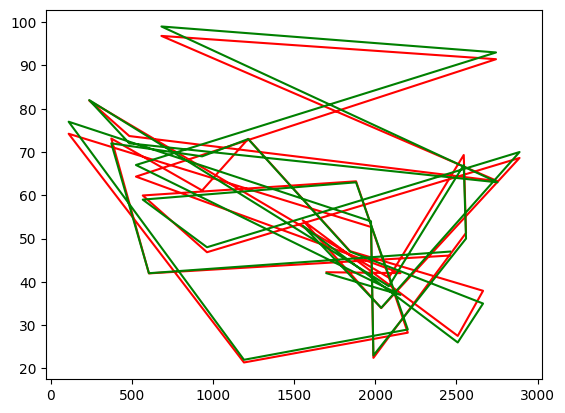

In [16]:
sam=ed.sample(30)
from matplotlib import pyplot as plt
plt.plot(sam['Pred'],color='red')
plt.plot(sam['real'],color='green')